# Keras 卷積神經網路(CNN) 手寫數字辨識模型

匯入需要的模組

In [7]:
from keras.datasets import mnist # 匯入 mnist 數據集
from keras.utils import np_utils # 可以將 label 轉換為 One-Hot encoding 
import numpy as np
np.random.seed(10)

訓練資料 x_Train
訓練標籤 y_Train

測試資料 x_Test
測試標籤 y_Test

In [8]:
(x_Train, y_Train), (x_Test, y_Test) = mnist.load_data()

查看 mnist 資料集筆數

In [9]:
print('Train data =', len(x_Train))
print('Test data =', len(x_Test))

Train data = 60000
Test data = 10000


查看每一張圖片的大小
- 60000 和 10000 分別表示 "張數"
- 28, 28 表示 長寬為 28x28 的大小

In [10]:
print(x_Train.shape)
print(x_Test.shape)

(60000, 28, 28)
(10000, 28, 28)


使用 matplotlib 可以輸出 images 手寫數字的影像



In [11]:
# 匯入模組
import matplotlib.pyplot as plt

In [12]:
# 定義一個函數，後續傳入圖片當作參數，就會顯示圖片
def plot_image(image):
  pic = plt.gcf() # 設定顯示圖片的大小
  pic.set_size_inches(2,2)
  plt.imshow(image, cmap='binary') # 傳入參數 'binary' 表示以黑白顯示
  plt.show()

顯示第一張圖片

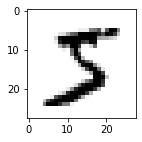

In [13]:
plot_image(x_Train[0])

查看第一張圖片的 label

In [14]:
y_Train[0]

5

## Reshape 的原因

- MLP(多元感知器)因為直接將資料集送入神經元，所以 reshape 轉換為 60000 筆，每一筆有 784 個數字，因此第一層會需要有 784 個神經元。

- CNN(卷積神經網路)因為必須先進行卷積和池化運算，所以必須保持影像的維度，所以 reshape 轉換為 60000 筆，每一筆有 28x28x1 的影像，分別為 28（寬）x 28（高）x 1（單色）。

In [15]:
x_Train4D = x_Train.reshape(x_Train.shape[0], 28, 28, 1).astype('float32')
x_Test4D = x_Test.reshape(x_Test.shape[0], 28, 28, 1).astype('float32')

將 features（數字的真實值）以 One-Hot encoding 轉換。
黑白圖片屬於灰階，是 2^8，除上 255 可以提高模型預測的轉卻度。

In [16]:
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

In [17]:
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

建立模型

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [19]:
model = Sequential()

## 卷積層 1 
- filters：需要設定一個整數，表示卷積濾波器的輸出數量。
- kernel_size：卷積核的大小，一般為正方形，邊長為奇數，便於尋找中心點，作用為掃描圖片。
- padding：補零方式，卷積層取週邊kernel_size的滑動視窗時，若超越邊界時，是否要放棄這個output點(valid)、一律補零(same)、還是不計算超越邊界的Input值(causal)。

In [20]:
model.add(Conv2D(filters=16,
                 kernel_size=(5,5),
                 padding='same',
                 input_shape=(28, 28, 1),
                 activation='relu'))

In [21]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [22]:
model.add(Conv2D(filters=36,
                 kernel_size=(5,5),
                 padding='same',
                 activation='relu'))

In [23]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [24]:
model.add(Dropout(0.25))

In [25]:
model.add(Flatten())

In [26]:
model.add(Dense(128, activation='relu'))

In [27]:
model.add(Dropout(0.5))

In [28]:
model.add(Dense(10, activation='softmax'))

In [29]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 36)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1764)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               2

進行訓練

In [30]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [31]:
train_history = model.fit(x=x_Train4D_normalize,
                          y=y_TrainOneHot,
                          validation_split=0.2,
                          epochs=10,
                          batch_size=300,
                          verbose=2)

Epoch 1/10
160/160 - 54s - loss: 0.5148 - accuracy: 0.8390 - val_loss: 0.1084 - val_accuracy: 0.9681
Epoch 2/10
160/160 - 52s - loss: 0.1425 - accuracy: 0.9572 - val_loss: 0.0711 - val_accuracy: 0.9787
Epoch 3/10
160/160 - 52s - loss: 0.1044 - accuracy: 0.9686 - val_loss: 0.0586 - val_accuracy: 0.9824
Epoch 4/10
160/160 - 52s - loss: 0.0828 - accuracy: 0.9753 - val_loss: 0.0526 - val_accuracy: 0.9836
Epoch 5/10
160/160 - 52s - loss: 0.0714 - accuracy: 0.9781 - val_loss: 0.0440 - val_accuracy: 0.9871
Epoch 6/10
160/160 - 52s - loss: 0.0628 - accuracy: 0.9813 - val_loss: 0.0411 - val_accuracy: 0.9877
Epoch 7/10
160/160 - 52s - loss: 0.0584 - accuracy: 0.9813 - val_loss: 0.0391 - val_accuracy: 0.9887
Epoch 8/10
160/160 - 52s - loss: 0.0525 - accuracy: 0.9842 - val_loss: 0.0374 - val_accuracy: 0.9890
Epoch 9/10
160/160 - 54s - loss: 0.0463 - accuracy: 0.9855 - val_loss: 0.0358 - val_accuracy: 0.9903
Epoch 10/10
160/160 - 53s - loss: 0.0427 - accuracy: 0.9873 - val_loss: 0.0344 - val_accura

In [32]:
def show_train_history(train_history, train, validation):
  plt.plot(train_history.history[train])
  plt.plot(train_history.history[validation])
  plt.title('Train History')
  plt.ylabel(train)
  plt.xlabel('Epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

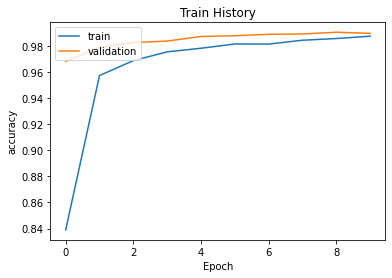

In [33]:
show_train_history(train_history, 'accuracy', 'val_accuracy')

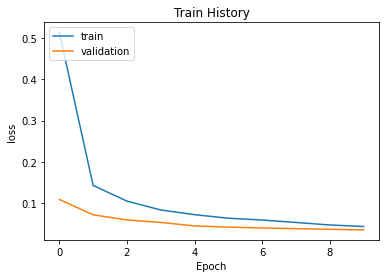

In [34]:
show_train_history(train_history, 'loss', 'val_loss')

評估模型準確率

In [35]:
scores = model.evaluate(x_Test4D_normalize, y_TestOneHot)
scores[1]

313/313 [==============================] - 5s 14ms/step - loss: 0.0258 - accuracy: 0.9916


0.991599977016449

進行預測

In [36]:
predict_x=model.predict(x_Test4D_normalize) 
classes_x=np.argmax(predict_x,axis=1)
classes_x[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

查看多筆訓練資料 images 和 label

In [39]:
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
  pic = plt.gcf()
  pic.set_size_inches(12, 14)
  if num > 25: num=25
  for i in range(0, num):
    ax = plt.subplot(5, 5, 1+i)
    ax.imshow(images[idx], cmap='binary')
    title = "label=" + str(labels[idx])
    if len(prediction)>0:
      title += ", predict="+str(prediction[idx])

    ax.set_title(title, fontsize=10)
    ax.set_xticks([]);ax.set_yticks([])
    idx+=1
  plt.show()

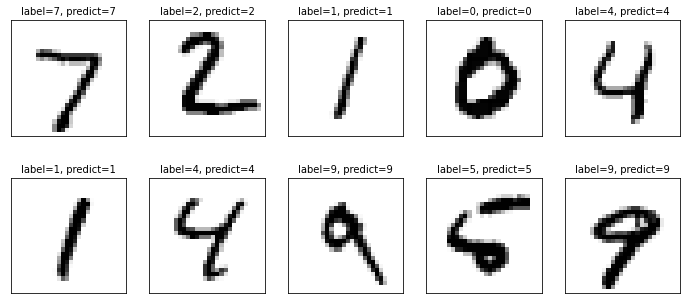

In [41]:
plot_images_labels_prediction(x_Test, y_Test, classes_x, idx=0)

# 參考資料：
1. [Day 08：CNN 模型設計](https://ithelp.ithome.com.tw/articles/10192028)
2. [Keras AttributeError: 'Sequential' object has no attribute 'predict_classes'](https://stackoverflow.com/questions/68836551/keras-attributeerror-sequential-object-has-no-attribute-predict-classes)